# Linear Algebra For AI and ML 

## Assignment 1

### Name : Navaneeth Shaji
### Roll no : 21CS30032

### Requirements : 
    Certain libraries must be installed in order to run the following program .
    The required libraries can be install by running the command "pip install -r requirements.txt"  on the terminal

In [82]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import pandas as pd
from scipy.linalg import toeplitz

## Question 1


In [27]:

# Load the MNIST dataset as one dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
# vectorize the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape, X_test.shape)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(60000, 784) (10000, 784)


In [29]:
# select the rows in X_train and y _train  where the label is 1 or 7
X_train_class1 = X_train[y_train == 1]
y_train_class1 = y_train[y_train == 1]
X_train_class7 = X_train[y_train == 7]
y_train_class7 = y_train[y_train == 7]

# combine the two classes
X_train = np.concatenate((X_train_class1, X_train_class7))
y_train = np.concatenate((y_train_class1, y_train_class7))

# select the rows in X_test and y _test  where the label is 1 or 7
X_test_class1 = X_test[y_test == 1]
y_test_class1 = y_test[y_test == 1]
X_test_class7 = X_test[y_test == 7]
y_test_class7 = y_test[y_test == 7]

# combine the two classes
X_test = np.concatenate((X_test_class1, X_test_class7))
y_test = np.concatenate((y_test_class1, y_test_class7))



# set the label  7 to -1
y_test = np.array(y_test).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
y_test[y_test == 7] = -1
y_train[y_train == 7] = -1


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(13007, 784) (2163, 784)
(13007,) (2163,)


In [30]:
# Modify the cost function to include the regularization term theta
I = np.identity(X_train.shape[1])
theta = 0.01

In [31]:
# calculate the alpha with regularization term
inverse = np.linalg.inv(np.matmul(X_train.T, X_train) + theta*I)
inverse = np.matmul(inverse, X_train.T)
alpha = np.dot(inverse, y_train)
print(alpha.shape)




(784,)


In [32]:
# predict the labels for X_test
y_pred = np.matmul(X_test, alpha)
y_pred[y_pred >= 0] = 1
y_pred[y_pred < 0] = -1

# calculate the accuracy
correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += 1
print("Accuracy: ", correct/len(y_pred))

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index = ['True 1', 'True -1'], columns = ['Predicted 1', 'Predicted -1'])

print("Confusion Matrix: ")
print(tabulate(cm, headers='keys', tablefmt='psql'))


Accuracy:  0.9889042995839112
Confusion Matrix: 
+---------+---------------+----------------+
|         |   Predicted 1 |   Predicted -1 |
|---------+---------------+----------------|
| True 1  |          1007 |             21 |
| True -1 |             3 |           1132 |
+---------+---------------+----------------+


## Question 2

In [33]:
# Load the MNIST dataset as one dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
# vectorize the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [35]:
# making dataset for each class
#class 0
X_train_class0 = X_train[y_train == 0]
X_train_classNOT0 = X_train[y_train != 0]
y_train_class0 = y_train[y_train == 0]
y_train_classNOT0 = y_train[y_train != 0]

random_indices = np.random.choice(X_train_classNOT0.shape[0], X_train_class0.shape[0], replace=False)
X_train_classNOT0 = X_train_classNOT0[random_indices]
y_train_classNOT0 = y_train_classNOT0[random_indices]

y_train_class0 = np.array(y_train_class0).astype(np.int8)
y_train_classNOT0 = np.array(y_train_classNOT0).astype(np.int8)
y_train_class0[y_train_class0 == 0] = 1
y_train_classNOT0[y_train_classNOT0 != 0] = -1


#combine
X_train_class0 = np.concatenate((X_train_class0, X_train_classNOT0))
y_train_class0 = np.concatenate((y_train_class0, y_train_classNOT0))


# Class 1
X_train_class1 = X_train[y_train == 1]
X_train_classNOT1 = X_train[y_train != 1]
y_train_class1 = y_train[y_train == 1]
y_train_classNOT1 = y_train[y_train != 1]

random_indices = np.random.choice(X_train_classNOT1.shape[0], X_train_class1.shape[0], replace=False)
X_train_classNOT1 = X_train_classNOT1[random_indices]
y_train_classNOT1 = y_train_classNOT1[random_indices]

y_train_class1 = np.array(y_train_class1).astype(np.int8)
y_train_classNOT1 = np.array(y_train_classNOT1).astype(np.int8)
y_train_class1[y_train_class1 == 1] = 1
y_train_classNOT1[y_train_classNOT1 != 1] = -1

#combine
X_train_class1 = np.concatenate((X_train_class1, X_train_classNOT1))
y_train_class1 = np.concatenate((y_train_class1, y_train_classNOT1))


#class 2
X_train_class2 = X_train[y_train == 2]
X_train_classNOT2 = X_train[y_train != 2]
y_train_class2 = y_train[y_train == 2]
y_train_classNOT2 = y_train[y_train != 2]

random_indices = np.random.choice(X_train_classNOT2.shape[0], X_train_class2.shape[0], replace=False)
X_train_classNOT2 = X_train_classNOT2[random_indices]
y_train_classNOT2 = y_train_classNOT2[random_indices]

y_train_class2 = np.array(y_train_class2).astype(np.int8)
y_train_classNOT2 = np.array(y_train_classNOT2).astype(np.int8)
y_train_class2[y_train_class2 == 2] = 1
y_train_classNOT2[y_train_classNOT2 != 2] = -1

#combine
X_train_class2 = np.concatenate((X_train_class2, X_train_classNOT2))
y_train_class2 = np.concatenate((y_train_class2, y_train_classNOT2))





#class 3
X_train_class3 = X_train[y_train == 3]
X_train_classNOT3 = X_train[y_train != 3]
y_train_class3 = y_train[y_train == 3]
y_train_classNOT3 = y_train[y_train != 3]

random_indices = np.random.choice(X_train_classNOT3.shape[0], X_train_class3.shape[0], replace=False)
X_train_classNOT3 = X_train_classNOT3[random_indices]
y_train_classNOT3 = y_train_classNOT3[random_indices]

y_train_class3 = np.array(y_train_class3).astype(np.int8)
y_train_classNOT3 = np.array(y_train_classNOT3).astype(np.int8)
y_train_class3[y_train_class3 == 3] = 1
y_train_classNOT3[y_train_classNOT3 != 3] = -1

#combine
X_train_class3 = np.concatenate((X_train_class3, X_train_classNOT3))
y_train_class3 = np.concatenate((y_train_class3, y_train_classNOT3))





#class 4
X_train_class4 = X_train[y_train == 4]
X_train_classNOT4 = X_train[y_train != 4]
y_train_class4 = y_train[y_train == 4]
y_train_classNOT4 = y_train[y_train != 4]

random_indices = np.random.choice(X_train_classNOT4.shape[0], X_train_class4.shape[0], replace=False)
X_train_classNOT4 = X_train_classNOT4[random_indices]
y_train_classNOT4 = y_train_classNOT4[random_indices]

y_train_class4 = np.array(y_train_class4).astype(np.int8)
y_train_classNOT4 = np.array(y_train_classNOT4).astype(np.int8)
y_train_class4[y_train_class4 == 4] = 1
y_train_classNOT4[y_train_classNOT4 != 4] = -1

#combine
X_train_class4 = np.concatenate((X_train_class4, X_train_classNOT4))
y_train_class4 = np.concatenate((y_train_class4, y_train_classNOT4))





#class 5
X_train_class5 = X_train[y_train == 5]
X_train_classNOT5 = X_train[y_train != 5]
y_train_class5 = y_train[y_train == 5]
y_train_classNOT5 = y_train[y_train != 5]

random_indices = np.random.choice(X_train_classNOT5.shape[0], X_train_class5.shape[0], replace=False)
X_train_classNOT5 = X_train_classNOT5[random_indices]
y_train_classNOT5 = y_train_classNOT5[random_indices]

y_train_class5 = np.array(y_train_class5).astype(np.int8)
y_train_classNOT5 = np.array(y_train_classNOT5).astype(np.int8)
y_train_class5[y_train_class5 == 5] = 1
y_train_classNOT5[y_train_classNOT5 != 5] = -1

#combine
X_train_class5 = np.concatenate((X_train_class5, X_train_classNOT5))
y_train_class5 = np.concatenate((y_train_class5, y_train_classNOT5))





#class 6
X_train_class6 = X_train[y_train == 6]
X_train_classNOT6 = X_train[y_train != 6]
y_train_class6 = y_train[y_train == 6]
y_train_classNOT6 = y_train[y_train != 6]

random_indices = np.random.choice(X_train_classNOT6.shape[0], X_train_class6.shape[0], replace=False)
X_train_classNOT6 = X_train_classNOT6[random_indices]
y_train_classNOT6 = y_train_classNOT6[random_indices]

y_train_class6 = np.array(y_train_class6).astype(np.int8)
y_train_classNOT6 = np.array(y_train_classNOT6).astype(np.int8)
y_train_class6[y_train_class6 == 6] = 1
y_train_classNOT6[y_train_classNOT6 != 6] = -1

#combine
X_train_class6 = np.concatenate((X_train_class6, X_train_classNOT6))
y_train_class6 = np.concatenate((y_train_class6, y_train_classNOT6))





#class 7
X_train_class7 = X_train[y_train == 7]
X_train_classNOT7 = X_train[y_train != 7]
y_train_class7 = y_train[y_train == 7]
y_train_classNOT7 = y_train[y_train != 7]

random_indices = np.random.choice(X_train_classNOT7.shape[0], X_train_class7.shape[0], replace=False)
X_train_classNOT7 = X_train_classNOT7[random_indices]
y_train_classNOT7 = y_train_classNOT7[random_indices]

y_train_class7 = np.array(y_train_class7).astype(np.int8)
y_train_classNOT7 = np.array(y_train_classNOT7).astype(np.int8)
y_train_class7[y_train_class7 == 7] = 1
y_train_classNOT7[y_train_classNOT7 != 7] = -1


#combine
X_train_class7 = np.concatenate((X_train_class7, X_train_classNOT7))
y_train_class7 = np.concatenate((y_train_class7, y_train_classNOT7))


#class 8
X_train_class8 = X_train[y_train == 8]
X_train_classNOT8 = X_train[y_train != 8]
y_train_class8 = y_train[y_train == 8]
y_train_classNOT8 = y_train[y_train != 8]

random_indices = np.random.choice(X_train_classNOT8.shape[0], X_train_class8.shape[0], replace=False)
X_train_classNOT8 = X_train_classNOT8[random_indices]
y_train_classNOT8 = y_train_classNOT8[random_indices]

y_train_class8 = np.array(y_train_class8).astype(np.int8)
y_train_classNOT8 = np.array(y_train_classNOT8).astype(np.int8)
y_train_class8[y_train_class8 == 8] = 1
y_train_classNOT8[y_train_classNOT8 != 8] = -1

#combine
X_train_class8 = np.concatenate((X_train_class8, X_train_classNOT8))
y_train_class8 = np.concatenate((y_train_class8, y_train_classNOT8))



#class 9
X_train_class9 = X_train[y_train == 9]
X_train_classNOT9 = X_train[y_train != 9]
y_train_class9 = y_train[y_train == 9]
y_train_classNOT9 = y_train[y_train != 9]

random_indices = np.random.choice(X_train_classNOT9.shape[0], X_train_class9.shape[0], replace=False)
X_train_classNOT9 = X_train_classNOT9[random_indices]
y_train_classNOT9 = y_train_classNOT9[random_indices]

y_train_class9 = np.array(y_train_class9).astype(np.int8)
y_train_classNOT9 = np.array(y_train_classNOT9).astype(np.int8)
y_train_class9[y_train_class9 == 9] = 1
y_train_classNOT9[y_train_classNOT9 != 9] = -1

#combine
X_train_class9 = np.concatenate((X_train_class9, X_train_classNOT9))
y_train_class9 = np.concatenate((y_train_class9, y_train_classNOT9))


In [36]:
# setting the regularization term
theta = 0.01
I = np.identity(X_train.shape[1])

In [37]:
# applying least squares on each class
# class 0
inverse = np.linalg.inv(np.matmul(X_train_class0.T, X_train_class0)+theta*I)
alpha0 = np.matmul(inverse, X_train_class0.T)
alpha0 = np.matmul(alpha0, y_train_class0)

# class 1
inverse = np.linalg.inv(np.matmul(X_train_class1.T, X_train_class1)+theta*I)
alpha1 = np.matmul(inverse, X_train_class1.T)
alpha1 = np.matmul(alpha1, y_train_class1)

# class 2
inverse = np.linalg.inv(np.matmul(X_train_class2.T, X_train_class2)+theta*I)
alpha2 = np.matmul(inverse, X_train_class2.T)
alpha2 = np.matmul(alpha2, y_train_class2)

# class 3
inverse = np.linalg.inv(np.matmul(X_train_class3.T, X_train_class3)+theta*I)
alpha3 = np.matmul(inverse, X_train_class3.T)
alpha3 = np.matmul(alpha3, y_train_class3)

# class 4
inverse = np.linalg.inv(np.matmul(X_train_class4.T, X_train_class4)+theta*I)
alpha4 = np.matmul(inverse, X_train_class4.T)
alpha4 = np.matmul(alpha4, y_train_class4)

# class 5
inverse = np.linalg.inv(np.matmul(X_train_class5.T, X_train_class5)+theta*I)
alpha5 = np.matmul(inverse, X_train_class5.T)
alpha5 = np.matmul(alpha5, y_train_class5)

# class 6
inverse = np.linalg.inv(np.matmul(X_train_class6.T, X_train_class6) + theta*I)
alpha6 = np.matmul(inverse, X_train_class6.T)
alpha6 = np.matmul(alpha6, y_train_class6)

# class 7
inverse = np.linalg.inv(np.matmul(X_train_class7.T, X_train_class7) + theta*I)
alpha7 = np.matmul(inverse, X_train_class7.T)
alpha7 = np.matmul(alpha7, y_train_class7)

# class 8
inverse = np.linalg.inv(np.matmul(X_train_class8.T, X_train_class8) + theta*I)
alpha8 = np.matmul(inverse, X_train_class8.T)
alpha8 = np.matmul(alpha8, y_train_class8)

# class 9
inverse = np.linalg.inv(np.matmul(X_train_class9.T, X_train_class9) + theta*I)
alpha9 = np.matmul(inverse, X_train_class9.T)
alpha9 = np.matmul(alpha9, y_train_class9)

print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)
print(alpha5)
print(alpha6)
print(alpha7)
print(alpha8)
print(alpha9)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.73818869e+00  2.26409818e+00  1.60617009e+00  1.60617009e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.60617009e+00  1.85291588e+00  3.46189550e+00  2.81071318e+00
 -7.48594262e-01  9.09129775e-03 -1.14198362e-02  2.41932203e-02
 -3.97713674e-03  6.65805877e-03 -8.69699134e-03  5.70777634e-03
 -2.65056941e-03 -4.55263123e-03 -6.25552808e-04  8.75105130e-04
 -3.75270212e-03  3.05217328e-02 -2.42638173e-01  1.72348066e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.08330889e-01  2.12267175e+00
  3.35294233e+00 -1.23980

In [38]:
# For each sample in the test set, get a prediction from all 10 linear models and assign it the class for which it receives the highest score.

y_pred = np.zeros((X_test.shape[0], 10))
y_pred[:,0] = np.matmul(X_test, alpha0)
y_pred[:,1] = np.matmul(X_test, alpha1)
y_pred[:,2] = np.matmul(X_test, alpha2)
y_pred[:,3] = np.matmul(X_test, alpha3)
y_pred[:,4] = np.matmul(X_test, alpha4)
y_pred[:,5] = np.matmul(X_test, alpha5)
y_pred[:,6] = np.matmul(X_test, alpha6)
y_pred[:,7] = np.matmul(X_test, alpha7)
y_pred[:,8] = np.matmul(X_test, alpha8)
y_pred[:,9] = np.matmul(X_test, alpha9)

y_pred_final = np.argmax(y_pred, axis=1)

# calculate the accuracy
correct = 0
for i in range(len(y_pred)):
    if y_pred_final[i] == y_test[i]:
        correct += 1
print("Accuracy: ", correct/len(y_pred_final))


Accuracy:  0.8788


In [39]:
# make the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_final)

# making a dataframe for confusion matrix
import pandas as pd
confusion_matrix = pd.DataFrame(confusion_matrix, index = [i for i in range(10)], columns = [i for i in range(10)])



print("Confusion Matrix: ")
print(tabulate(confusion_matrix, headers = 'keys', tablefmt = 'psql'))

Confusion Matrix: 
+----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+
|    |   0 |    1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |
|----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----|
|  0 | 930 |    1 |   4 |   1 |   2 |  20 |  14 |   2 |   4 |   2 |
|  1 |   0 | 1093 |   4 |   5 |   1 |   3 |   3 |   1 |  25 |   0 |
|  2 |  17 |   30 | 822 |  26 |  23 |  13 |  21 |  16 |  57 |   7 |
|  3 |   7 |    4 |  17 | 875 |   5 |  40 |   7 |  14 |  29 |  12 |
|  4 |   2 |    5 |   6 |   1 | 904 |   3 |   7 |   3 |  10 |  41 |
|  5 |  13 |   11 |   1 |  40 |  10 | 747 |  17 |   9 |  28 |  16 |
|  6 |   9 |    9 |   5 |   4 |  22 |  33 | 867 |   0 |   9 |   0 |
|  7 |   4 |   25 |  19 |   7 |  21 |   6 |   5 | 849 |   8 |  84 |
|  8 |   7 |   25 |   6 |  25 |  15 |  27 |  15 |  10 | 821 |  23 |
|  9 |  13 |    9 |   2 |  10 |  49 |  12 |   1 |  17 |  16 | 880 |
+----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+


## Question 3


In [40]:
p = []
q = []

for i in range(100) :
    # populate p and q with random floating values between 10 and -10
    p.append(random.uniform(-10, 10))
    q.append(random.uniform(-10, 10))
    
# generating target variable b
b = [1 if(p[i]*q[1]>1) else -1 for i in range(100)]

p=np.array(p)
q=np.array(q)
b=np.array(b)

In [41]:
# generating A
A  = [[1,p[i],q[i],p[i]*p[i],q[i]*q[i],p[i]*q[i]] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 6)


In [42]:
# finding the coefficient vector x

x = np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T)
x = np.matmul(x, b)
print("The coefficient vector x is :")
print(x)

The coefficient vector x is :
[-7.49386060e-02  1.41625739e-01 -9.35360766e-03  9.06290980e-04
  7.65013518e-04  9.18059467e-05]


In [43]:
# predicting the target variable b
b_pred = np.matmul(A, x)
b_pred = [1 if(b_pred[i]>0) else -1 for i in range(100)]
print("The predicted target variable b is :")
print(b_pred)

# calculating the accuracy
acc = 0
for i in range(100) :
    if(b[i]==b_pred[i]) :
        acc+=1
print("The accuracy on the training set is  : " + str(acc/100))

The predicted target variable b is :
[1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1]
The accuracy on the training set is  : 0.99


## Question 4

In [44]:
p = []
q = []

for i in range(100) :
    # populate p 
    p.append(random.uniform(-1, 1))
    q.append(random.uniform(-1, 1))
    
# generating target variable b
b = [p[i]*p[i] + q[i]*q[i] + p[i]*q[i] for i in range(100)]

p=np.array(p)
q=np.array(q)
b=np.array(b)

In [45]:
# generating A
A  = [[1,p[i],q[i],p[i]*p[i],q[i]*q[i],p[i]*q[i]] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 6)


In [46]:
# finding the coefficient vector x

x = np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T)
x = np.matmul(x, b)
print("The coefficient vector x is :")
print(x)

The coefficient vector x is :
[-8.60422844e-16 -2.32452946e-16 -2.77555756e-17  1.00000000e+00
  1.00000000e+00  1.00000000e+00]


In [47]:
# find the mean squared error
b_pred = np.matmul(A, x)
mse = 0
for i in range(100) :
    mse += (b[i]-b_pred[i])**2
mse/=100
print("The mean squared error is : " + str(mse))

The mean squared error is : 3.567226702293482e-31


## Question 5


In [48]:
p = []

for i in range(100) :
    # populate p 
    p.append(random.uniform(0, 1))
    
# generating target variable b
b = [7*p[i]-3*p[i]*p[i] for i in range(100)]

p=np.array(p)
b=np.array(b)

In [49]:
def f(x,j,n) :
    return ((x>=(j-1)/n) & (x<(2*j-1)/n))*(2*n*(x-(j-1)/n)) + ((x>=(2*j-1)/n) & (x<j/n))*(2*n*((j/n)-x))

In [50]:
# Q5(a)
# generating A for N=10

A = [[f(p[i],j,10) for j in range(1,11)] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 10)


In [51]:
inverse = np.linalg.inv(np.matmul(A.T, A))
x = np.matmul(inverse, A.T)
x = np.matmul(x, b)
print("x is :")
print(x)

# obtaining the mean squared error
b_pred = np.matmul(A, x)
mse = 0
for i in range(100) :
    mse += (b[i]-b_pred[i])**2

mse/=100
print("The mean squared error is : " + str(mse))

x is :
[ 0.33884248  0.38730295  0.45691489  0.14516864  0.01326888  1.32175571
 -1.20164635  0.28294238 -0.35126366  0.0712216 ]
The mean squared error is : 0.17971754377740062


In [52]:
# generating A for N=50 
A = [[f(p[i],j,50) for j in range(1,51)] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 50)


In [53]:
inverse = np.linalg.inv(np.matmul(A.T, A))
x = np.matmul(inverse, A.T)
x = np.matmul(x, b)
print("x is :")
print(x)

# obtaining the mean squared error
b_pred = np.matmul(A, x)
mse = 0
for i in range(100) :
    mse += (b[i]-b_pred[i])**2

mse/=100
print("The mean squared error is : " + str(mse))

x is :
[ 6.95797254e-02  9.63674768e-02  6.24245554e-02  8.20654431e-02
  7.94471014e-02  3.68642900e-02  5.56621427e-03  3.64251693e-03
  1.94140792e-01 -3.71522390e-04 -8.28527276e-04 -8.62966639e-04
 -1.84031240e-01  4.58840056e-02  6.71053332e-05  3.55265139e-02
 -7.45489224e-02  2.00010600e+00 -1.77659448e+00  3.62999053e-04
 -4.85800657e-03 -1.16594709e-03  2.18719614e-05 -8.65861715e-03
  1.58073863e-02 -3.19772604e+00  4.24846092e+00 -1.19268677e+00
 -9.63046763e-03  1.77804079e-03 -3.64901385e-03  7.11603652e-01
 -2.05227578e+00  1.29867681e+00  3.60008918e+01 -3.40025228e+01
 -3.37571655e+01  3.19775719e+01 -1.49360311e-03  2.14036564e-02
 -1.40216181e-01  1.22744787e-01 -4.80777062e-02  3.20717201e-02
  1.76026868e-04 -1.29329803e-03 -2.09577263e-01  1.97977867e-01
 -8.11196890e-04  4.35346237e-01]
The mean squared error is : 0.003903784406116914


In [54]:
# Q5(b)

# generating A for N=150 
A = [[f(p[i],j,150) for j in range(1,151)] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 150)


In [55]:
# finding x for the multi-objective optimization problem

I = np.identity(150)
theta = random.uniform(0,0.2)

inverse = np.linalg.inv(np.matmul(A.T, A) * 1/150 + I*theta) 
inverse = inverse * 1/150
x = np.matmul(inverse, A.T)
x = np.matmul(x, b)
print("x is :")
print(x)

# obtaining the mean squared error
b_pred = np.matmul(A, x)
mse = 0
for i in range(100) :
    mse += (b[i]-b_pred[i])**2
    
mse/=100
print("The mean squared error is : " + str(mse))

x is :
[ 0.00000000e+00  1.65039560e-02  2.68320050e-03  2.21795267e-02
  1.94471177e-02  1.76185356e-02  2.00485149e-02  1.13012336e-02
  1.05502114e-02  1.41972783e-02  8.87343278e-03  1.18006173e-02
  6.68893499e-03  7.81147023e-03  7.10579445e-03  8.69108300e-03
  1.21019905e-03  8.51591337e-03  6.82546743e-03  3.35403353e-03
  5.93689809e-03  3.29624545e-03  6.32058381e-03  4.57903070e-03
  1.92183506e-03  7.54917517e-03  4.17191954e-03  2.92030225e-03
  3.09261749e-03  3.63779441e-03  2.25579657e-03  3.74970609e-03
  2.02056339e-03  3.36085155e-03  2.74019748e-03  2.08864589e-03
  9.56913056e-04  4.98177530e-03 -6.62568873e-05  2.91538655e-03
  4.43711957e-03  1.76324347e-03  2.52147246e-03  2.68696498e-03
  1.84792609e-03  1.63201565e-03  4.63837582e-03  5.18077138e-04
  1.08245341e-03  5.42593476e-03  7.68240612e-04  3.67144912e-03
  4.28969577e-04  5.03712702e-03  1.62327546e-03 -1.78030540e-03
  7.61601984e-04  6.46363555e-05  1.80499841e-03  8.32005526e-04
 -4.93113589e-04  

In [56]:
# generating A for N=200

A = [[f(p[i],j,200) for j in range(1,201)] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 200)


In [57]:
# finding x for the multi-objective optimization problem

I = np.identity(200)
theta = random.uniform(0,0.2)

inverse = np.linalg.inv(np.matmul(A.T, A) * 1/200 + I*theta)
inverse = inverse * 1/200
x = np.matmul(inverse, A.T)
x = np.matmul(x, b)
print("x is :")
print(x)

# obtaining the mean squared error
b_pred = np.matmul(A, x)
mse = 0
for i in range(100) :
    mse += (b[i]-b_pred[i])**2
    
mse/=100
print("The mean squared error is : " + str(mse))

x is :
[ 0.00000000e+00  1.12089140e-02  1.10869901e-02  9.70673371e-03
  1.21953050e-02  1.47392039e-02  1.17848721e-02  5.77570139e-03
  1.35958320e-02  8.45135186e-03  7.17136653e-03  3.58340274e-03
  7.68188998e-03  6.65658498e-03  3.46629169e-03  8.96932152e-03
  5.10883464e-03  5.88316728e-03  3.67164824e-03  1.44053975e-03
  1.68493100e-03  5.49048259e-03  5.23033281e-03  3.67725323e-03
  2.50906676e-03  1.44992777e-03  2.91112425e-03  1.48537001e-03
  3.86491137e-03  3.31618926e-03  2.06863373e-03  1.92925618e-03
  2.80991798e-03  4.58269679e-03  3.06175549e-03  1.56245156e-03
  1.99799156e-04  2.76444729e-03  1.90708262e-03  1.93250548e-03
  1.55205487e-03  2.27962134e-03  5.70557506e-04  6.40596305e-04
  1.56548657e-03  1.35120057e-03  2.04326227e-03  1.57097612e-03
  7.30769272e-04  3.64850099e-03  1.31512530e-03 -1.01825039e-03
  2.66025623e-03  3.04083573e-03  1.14892318e-03  1.66272072e-03
  2.03006389e-03  9.17624867e-04  1.70931819e-03  1.36119488e-03
  1.11668936e-03  

We notice as the number of basis functions(n) increases , the model is able to better fit the data in A . 
This is eveident by comparing the mean sqaured error values obtained for the 4 different values of n tried above.

## Question 6

In [58]:
# load the auto-regressive dataset
data = pd.read_csv("auto-regressive-data.csv")

# set the consumption column as the target variable
Y = data['Consumption'].values

In [59]:
# Creating lag features for each sample with the number of lag variables set to 8.

lag = 8
for i in range(1, lag+1):
    data['lag' + str(i)] = data['Consumption'].shift(i)
    

In [60]:
# creating the dataset using the consumption column and the lag features
X = data[['Consumption', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8']].values
X = pd.DataFrame(X)
X.columns = ['Consumption', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8']

# remove the last row from X
X = X[:-1]
# setting y[i] = y[i+1] for each target variable
y = Y[1:]

# remove rows in X with null and corresponding row in y as well 
X=X[8:]
y=y[8:]


print(X[0:10])
print(y)


    Consumption      lag1      lag2      lag3      lag4      lag5      lag6  \
8      1529.323  1207.985  1300.287  1403.427  1477.131  1457.217  1442.533   
9      1576.911  1529.323  1207.985  1300.287  1403.427  1477.131  1457.217   
10     1577.176  1576.911  1529.323  1207.985  1300.287  1403.427  1477.131   
11     1553.280  1577.176  1576.911  1529.323  1207.985  1300.287  1403.427   
12     1545.002  1553.280  1577.176  1576.911  1529.323  1207.985  1300.287   
13     1359.945  1545.002  1553.280  1577.176  1576.911  1529.323  1207.985   
14     1265.475  1359.945  1545.002  1553.280  1577.176  1576.911  1529.323   
15     1563.738  1265.475  1359.945  1545.002  1553.280  1577.176  1576.911   
16     1598.303  1563.738  1265.475  1359.945  1545.002  1553.280  1577.176   
17     1572.984  1598.303  1563.738  1265.475  1359.945  1545.002  1553.280   

        lag7      lag8  
8   1380.521  1069.184  
9   1442.533  1380.521  
10  1457.217  1442.533  
11  1477.131  1457.217  
12  1

In [61]:
# performing linear regression on the dataset
inverse = np.linalg.inv(np.matmul(X.T, X))
inverse = np.matmul(inverse, X.T)
x = np.matmul(inverse, y)
print("The coefficient vector x is :")
print(x)

The coefficient vector x is :
0    0.620847
1   -0.031338
2    0.086067
3   -0.041179
4    0.000276
5    0.079755
6    0.788296
7   -0.434790
8   -0.068580
dtype: float64


In [62]:
print(X.shape,x.shape)

# predicting the target variable
y_pred = np.dot(X, x)
print("The predicted target variable is :")
print(y_pred)

# calculating the mean squared error
mse = 0
for i in range(1, len(y_pred)):
    mse += (y[i]-y_pred[i])**2
mse/=len(y_pred)
print("The mean squared error is : " + str(mse))

(4374, 9) (9,)
The predicted target variable is :
[1545.94928531 1526.55653957 1555.84151371 ... 1274.61511251 1196.700392
 1112.102017  ]
The mean squared error is : 4967.854373277192


This is an acceptable mean squared error considering that the data wasnt normalised 

## Question 7

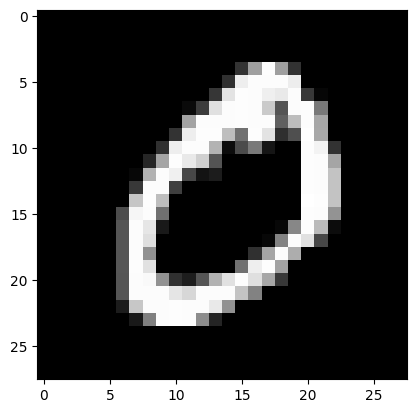

In [109]:

# Load the MNIST dataset as one dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# taking the first sample 
x = X_train[1]

#display the image x
plt.imshow(x, cmap='gray')

x = x.flatten()
target = y_train[0]

In [88]:
# create a 3x3 numpy array
kernel = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])

# vectorise the kernel
print(kernel.shape)

(9,)


In [89]:
# create a toeplitz matrix


In [103]:
# let y have the blurred image
# y = np.matmul(A,x)

# constructing Dh matrix
I = np.identity(28)
Dh = np.block([[(j==i-1)*(-I)+(j==i)*(I)+np.zeros((28,28)) for j in range(28)] for i in range(1,28)])
print(Dh.shape)

# constructing D matrix
D = [[(j==i-1)*(-1)+(j==i)*(1)+0 for j in range(28)] for i in range(1,28)]
D = np.array(D)
print(D.shape)

# consteucting Dv matrix
Dv = np.block([[(j==i)*D+np.zeros((27,28)) for j in range(28)]for i in range(28)])
print(Dv.shape)

(756, 784)
(27, 28)
(756, 784)


In [ ]:
# finding the deblurred image x_hat with initial lambda = 0.007
lambda1 = 0.007
temp = np.matmul(A.T, A) + lambda1*np.matmul(Dh.T, Dh) + lambda1*np.matmul(Dv.T, Dv)
temp = np.linalg.inv(temp)
temp = np.matmul(temp, A.T)
x_hat = np.matmul(temp, y)

In [ ]:
# print the deblurred image
x_hat = x_hat.reshape(28,28)
plt.imshow(x_hat, cmap='gray')

## Question 8



In [ ]:
p = []
q = []

for i in range(100) :
    # populate p and q with random floating values between 10 and -10
    p.append(random.uniform(-1, 1))
    q.append(random.uniform(-1, 1))
    
# generating target variable b
b = [(p[i]*q[1]+p[i]*p[i]+q[i]*q[i]) for i in range(100)]

p=np.array(p)
q=np.array(q)
b=np.array(b)

In [ ]:
# generating A
A  = [[1,p[i],q[i],p[i]*p[i],q[i]*q[i],p[i]*q[i]] for i in range(100)]
A = np.array(A)
print(A.shape)

(100, 6)


In [ ]:
# using gradient descent to apply least squares on A with target varible as b

def find_gradient(X,y,theta) :
    m=X.shape[0]
    n=X.shape[1]
    
    dl_d0=np.zeros((n,))
    theta_transpose = np.transpose(theta)
    
    for j in range(n) :
         err = np.matmul(X,theta_transpose)-y
         err = np.dot(err,X[:,j])
         dl_d0[j] = err/m
        
    return dl_d0

In [ ]:
def gradient_descent(X_train,y_train,alpha,iterations) : 
    m = X_train.shape[0]
    n= X_train.shape[1]
    
    # setting initial theta to be all 1s
    theta = np.ones(n)
    
    for i in range(iterations) :
        gradient = find_gradient(X_train,y_train,theta)
        theta = theta - alpha*gradient
        
    return theta

In [ ]:
# setting learning rate and number of iterations
l_rate = 0.1
iterations = 2000

x = gradient_descent(A,b,l_rate,iterations)

print("x is ",x)


x is  [ 3.84839089e-07  1.78336743e-01  2.47784318e-08  9.99999735e-01
  9.99999058e-01 -2.69600982e-07]


In [ ]:
# prediction on the train set
b_pred = np.matmul(A,x)


# calculating the mean squared error
mse = 0
for i in range(1, len(b_pred)):
    mse += (b[i]-b_pred[i])**2
mse/=len(b_pred)
print("The mean squared error is : " + str(mse))

The mean squared error is : 6.031990563013377e-14


## Question 9

In [ ]:
# load the  dataset
data = pd.read_csv("assignment9_data.csv")

In [ ]:
# splitting the data into sets that lie in 3 different intervals of t
set1 = data[data['t']<=1]
set2 = data[(data['t']>=1) & (data['t']<=2)]
set3 = data[data['t']>=2]

In [ ]:
# generating the matrix A as a block matrix and target vector b

M1 = [[1,set1['t'].iloc[i],set1['t'].iloc[i]**2] for i in range(set1.shape[0])]
M2 = [[1,set2['t'].iloc[i],set2['t'].iloc[i]**2,set2['t'].iloc[i]**3] for i in range(set2.shape[0])]
M3 = [[1,set3['t'].iloc[i],set3['t'].iloc[i]**2] for i in range(set3.shape[0])]

M1 = np.array(M1)
M2 = np.array(M2)
M3 = np.array(M3)

A = np.block([[M1,np.zeros((50,4)),np.zeros((50,3))], [np.zeros((50,3)),M2,np.zeros((50,3))], [np.zeros((50,3)),np.zeros((50,4)),M3]])
b = np.concatenate((set1['b'].values,set2['b'].values,set3['b'].values))

print("A.shape is ",A.shape)
print("b.shape is ",b.shape)

A.shape is  (150, 10)
b.shape is  (150,)


In [ ]:
# making the matrix C and d
C = [[1,1,1,-1,-1,-1,-1,0,0,0],[0,0,0,1,2,4,8,-1,-2,-4],[0,0,0,0,1,4,12,0,-1,-4]]
C = np.array(C)
d= np.zeros((3,))
print("C.shape is ",C.shape)
print("d.shape is ",d.shape)

C.shape is  (3, 10)
d.shape is  (3,)


In [ ]:
# making the KKT matrix and the target vector

KKT = np.block([[2*np.matmul(A.T,A),C.T],[C,np.zeros((3,3))]])
target = np.concatenate((2*np.matmul(A.T,b),d))

In [ ]:
# let theta be the output of the optimization problem

theta = np.matmul(np.linalg.inv(KKT),target)
print(theta.shape)

(13,)


In [ ]:
# the last 3 elements of theta are the lagrange multipliers
lagrange = theta[7:]

# the first 10 elements of theta are the coefficients of the polynomial
coeff = theta[:10]
print(coeff)
# fitting the 3 polynomials
poly1 = np.poly1d(coeff[:3])
poly2 = np.poly1d(coeff[3:7])
poly3 = np.poly1d(coeff[7:10])

# printing the polynomials
print("The first polynomial is : ")
print(poly1)
print("The second polynomial is : ")
print(poly2)
print("The third polynomial is : ")
print(poly3)

[ 4.00000000e+00 -3.00000000e+00  1.00000000e+00  1.00000000e+00
 -3.49245965e-10 -2.00000000e+00  3.00000000e+00 -3.50000000e+01
  2.40000000e+01  1.00000000e+00]
The first polynomial is : 
   2
4 x - 3 x + 1
The second polynomial is : 
   3             2
1 x - 3.492e-10 x - 2 x + 3
The third polynomial is : 
     2
-35 x + 24 x + 1
